# Conversation Analysis in PRs
<!-- Sharif Ahmed -->

In [ ]:
import convokit
from convokit import Corpus
from convokit import download
from convokit.text_processing import TextParser

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
prs = pd.read_csv('../data/interim/fts/prs.csv')
prcs = pd.read_csv('../data/interim/fts/prcs.csv')

/var/folders/94/4x0brghx6s91c406cy18h_cw0000gq/T/ipykernel_96308/3643496354.py:1: DtypeWarning: Columns (23,50) have mixed types. Specify dtype option on import or set low_memory=False.
  prs = pd.read_csv('../data/interim/fts/prs.csv')


In [ ]:
prcs['timestamp'] = pd.to_datetime(prcs.created_at)

In [ ]:
prcs.timestamp  = prcs.timestamp.apply(lambda x: x.timestamp())

In [ ]:
prs['timestamp'] = pd.to_datetime(prs.created_at)
prs.timestamp  = prs.timestamp.apply(lambda x: x.timestamp())

In [ ]:
ucol = [
    'id', 
    'timestamp', 'body',  
    'in_reply_to_id', 
    'user_login']

In [ ]:
uttmeta = ['is_useful','gender','country','project', 'pr_num','react_total_count',]

In [ ]:
prcs.loc[prcs.in_reply_to_id.notna(),'in_reply_to_id']=prcs.loc[prcs.in_reply_to_id.notna(),'in_reply_to_id'].apply(int)

In [ ]:
prcs.loc[prcs.in_reply_to_id.isna(),'in_reply_to_id']=None

In [ ]:
utt_df = prcs[ucol+uttmeta]

In [ ]:
utt_df=  utt_df.rename(columns={ 'user_login':'speaker','in_reply_to_id':'reply_to', 'body':'text'} )

In [ ]:
utt_df=  utt_df.rename(columns={ x:'meta.'+x for x in uttmeta} )

In [ ]:
sp_df = pd.DataFrame(prcs.user_login.unique(),columns=['id'])

In [ ]:
ccol = ['id', 'node_id', 'number', 'state', 'locked', 'title',
       'user', 'body', 'created_at', 'updated_at', 'closed_at', 'merged_at',
       'merge_commit_sha', 'assignee', 'assignees', 'requested_reviewers',
       'requested_teams', 'milestone', 'draft', 'head', 'base',
       'author_association', 'auto_merge', 'active_lock_reason', 'merged',
       'mergeable', 'rebaseable', 'mergeable_state', 'merged_by', 'comments',
       'review_comments', 'maintainer_can_modify', 'commits', 'additions',
       'deletions', 'changed_files', 'project', 'user_type', 'user_login',
       'user_id', 'label_counts', 'label_names', 'is_bug', 'tmp-lbl',
       'readability', 'title_readability', 'closure_duration', '1st_comment',
       '1st_response', '1st_self_comment', 'pr_num', 'u_types', 'n_uids',
       'u_associations', 'react_+1', 'react_-1', 'react_laugh', 'react_hooray',
       'react_confused', 'react_heart', 'react_rocket', 'react_eyes',
       'react_total_count', 'readability_from_cmt', 'cr_senti', 'is_toxic',
       'is_useful', 'n_utypes', 'n_uassociations', 'new_label', 'milestone_id',
       'merge_duration', 'country', 'gender', 'timestamp']


In [ ]:
res= pd.merge(utt_df.reset_index(),prs[['id','project', 'number']].reset_index(), how='left', left_on=['meta.project','meta.pr_num'], right_on=['project', 'number'])


In [ ]:
utt_df['conversation_id']=res.id_y


In [ ]:
covmeta = ['state', 'locked', 'title',
       'body',    
       'project',  
       '1st_response',
       'cr_senti', 'is_toxic',
       'is_useful',
       'new_label', 'milestone_id',
       'merge_duration', 'country', 'gender', 'timestamp']

In [ ]:
co_df= prs.loc[prs.comments>0,['id']+covmeta]

In [ ]:
co_df =co_df.rename(columns={ x:'meta.'+x for x in covmeta})

In [ ]:
co_df

,id,meta.state,meta.locked,meta.title,meta.body,meta.project,meta.1st_response,meta.cr_senti,meta.is_toxic,meta.is_useful,meta.new_label,meta.milestone_id,meta.merge_duration,meta.country,meta.gender,meta.timestamp
1,259582800,closed,False,Big int,"Hi all,\r\nI have pretty much finished the Big...",P3,NaN,0.0,0.0,0.444444,set(),NaN,10 days 00:41:31,NaN,unknown,1.552074e+09
2,266435224,closed,False,bug fix FCFJacobi,I've run into an issue with hypre_BoomerAMGRel...,P3,79 days 10:51:25,NaN,NaN,NaN,{'bug'},NaN,10 days 00:51:42,United States,male,1.554161e+09
4,271410683,closed,False,fix compilation,NaN,P3,NaN,NaN,NaN,NaN,set(),NaN,NaN,NaN,unknown,1.555524e+09
6,275782100,open,False,Add HYPRE_ParCSRHybridGetFinalResidualNorm,"Also adds HYPRE_{PCG,GMRES,BiCGSTAB}GetFinalRe...",P3,NaN,NaN,NaN,NaN,set(),NaN,NaN,United States,male,1.556903e+09
9,291781188,closed,False,Umy fixes,I made various changes I would like to merge i...,P3,NaN,0.0,0.0,1.000000,set(),NaN,1 days 13:34:18,NaN,unknown,1.561510e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52166,1951745545,closed,False,SYCL CI: Manually build oneDPL,We are currently seeing\r\n```\r\n--2024-06-28...,P6,NaN,NaN,NaN,NaN,set(),NaN,0 days 06:13:17,United States,male,1.720016e+09
52167,1951799967,closed,False,For the HIP C++20 build use libc++,NaN,P6,NaN,NaN,NaN,NaN,set(),NaN,NaN,United States,male,1.720017e+09
52168,1951808593,closed,False,Add missing concepts include in test,Note this was implicitly likely there when mds...,P6,NaN,NaN,NaN,NaN,set(),NaN,0 days 05:39:45,United States,male,1.720018e+09
52169,1952322420,closed,False,Fix issue with ROCm 5.6 C++20 in jenkins,Supersede #7113,P6,NaN,NaN,NaN,NaN,set(),NaN,0 days 00:52:50,NaN,male,1.720037e+09


In [ ]:
utt_df.loc[utt_df.conversation_id.notna(),'conversation_id'] = utt_df.loc[utt_df.conversation_id.notna(),'conversation_id'].apply(int)

In [ ]:
new_corpus = Corpus.from_pandas(utterances_df=utt_df, speakers_df=sp_df, conversations_df=co_df)

In [ ]:
new_corpus.print_summary_stats()

Number of Speakers: 2253
Number of Utterances: 164708
Number of Conversations: 18050


In [ ]:
new_corpus.get_conversations_dataframe().drop(columns=['vectors']).head()

""
id
259582800.0
290378443.0
291781188.0
301687675.0
305735192.0


## ANALYSIS

In [ ]:
from convokit import Corpus, download, TextCleaner, FightingWords

In [ ]:
TextCleaner(verbosity=50000).transform(new_corpus)

50000/164708 utterances processed
100000/164708 utterances processed
150000/164708 utterances processed
164708/164708 utterances processed


In [ ]:

fw = FightingWords()
fw.fit(new_corpus, class1_func=lambda ux: ux.meta['is_useful']==1,
       class2_func=lambda ux: ux.meta['is_useful']==0, )

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 129332 valid corpus components. class2_func returned 35376 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


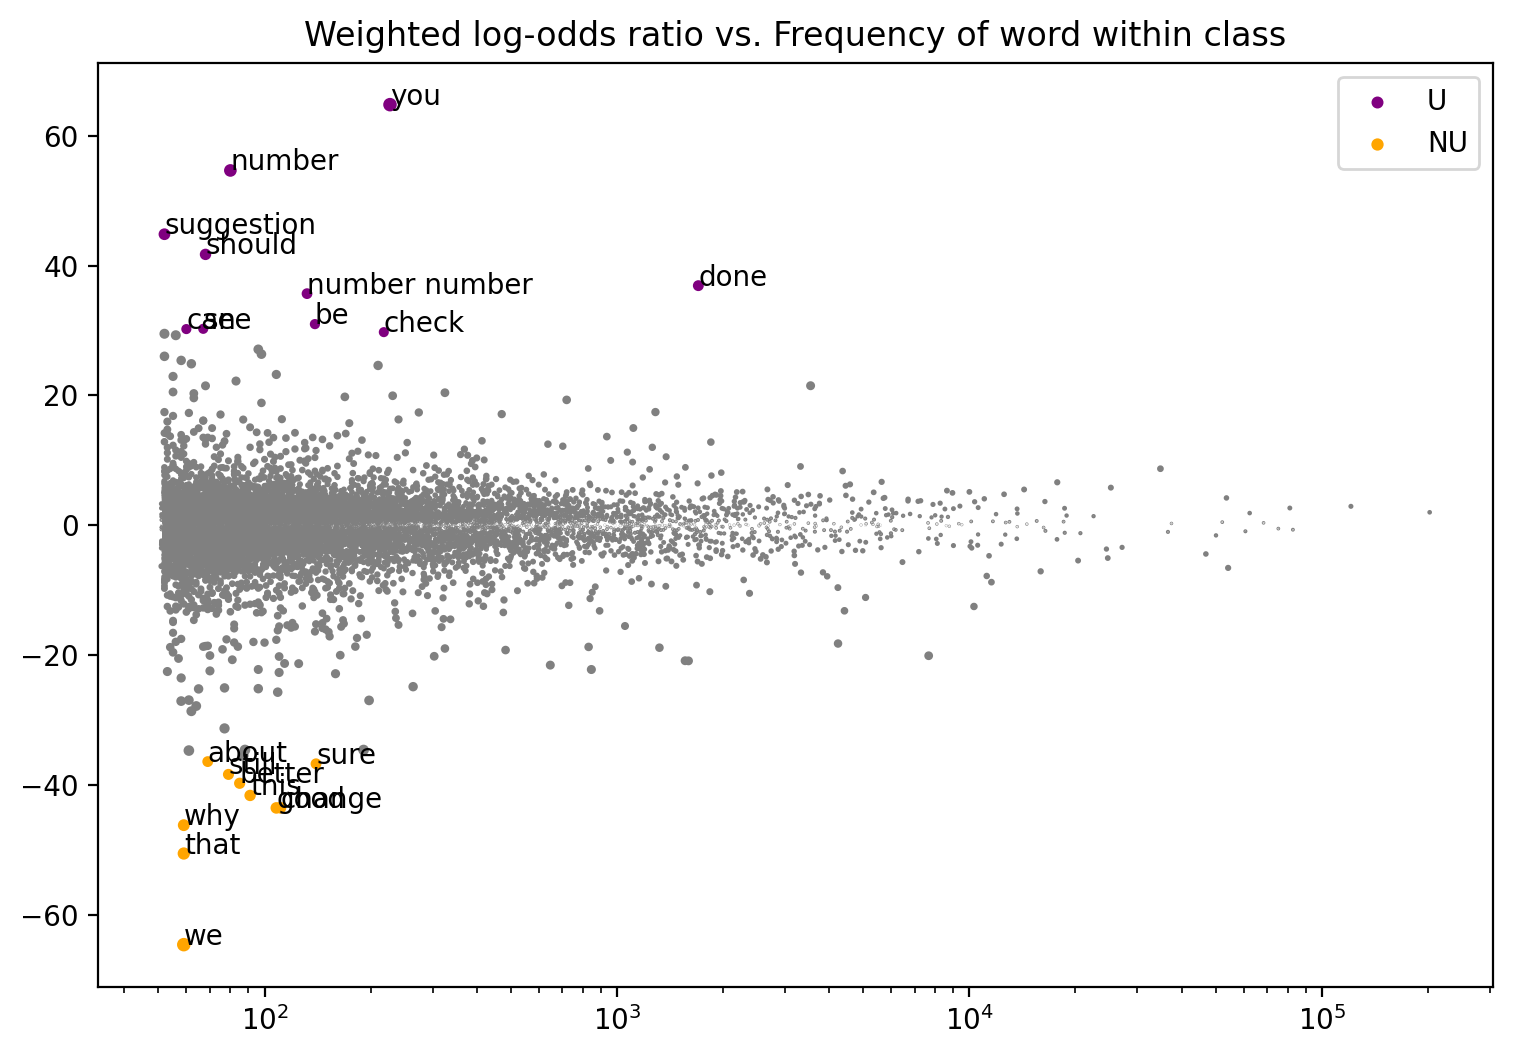

In [ ]:
udf = fw.summarize(new_corpus, plot=True, class1_name='U', class2_name='NU')    

Now let's obtain the graphs for individual projects

In [ ]:
for proj in prcs.project.unique():

    try:
   
        fw = FightingWords()


        fw.fit(new_corpus, class1_func=lambda ux: ux.meta['is_useful']==1 and ux.meta['project']==proj,
            class2_func=lambda ux: ux.meta['is_useful']==0 and ux.meta['project']==proj , )
        zdfs[proj] = fw.summarize(new_corpus, plot=True, class1_name=proj+'-U', class2_name=proj+'-NU')        
        
        
    except Exception as e: 
        print(proj, e)


Thank you!